In [9]:
!pip3 install splusdata --upgrade --quiet

In [1]:
import splusdata

ra = 151.278567
dec = -23.86669

conn = splusdata.Core()

In [2]:
res = conn.query(
    f'select top 1 * from idr6.idr6 where cone(ra,dec,{ra},{dec},0.00027)'
)

In [3]:
res

,id,random_idx,ra,dec,field,a_pixel_det,a_restricted_pixel_r,b_pixel_det,b_restricted_pixel_r,class_star_det,...,s2n_pstotal_j0430,s2n_pstotal_j0515,s2n_pstotal_j0660,s2n_pstotal_j0861,s2n_pstotal_r,s2n_pstotal_u,s2n_pstotal_z,theta_det,x_pixel_det,y_pixel_det
0,i06H001100USK,121142664,151.278567,-23.866692,HYDRA-0011,1.786988,1.785789,1.608429,1.615274,0.980641,...,19.000341,39.6186,91.571,61.14859,137.7113,12.094052,111.980286,-25.193413,2451.6821,5769.9434


In [4]:
bands = ['u', 'g', 'r', 'i', 'z', 'j0378', 'j0395', 'j0410', 'j0430', 'j0515', 'j0660', 'j0861']

In [8]:
cuts = [conn.stamp(ra, dec, band=band, size=96)[1].data for band in bands]

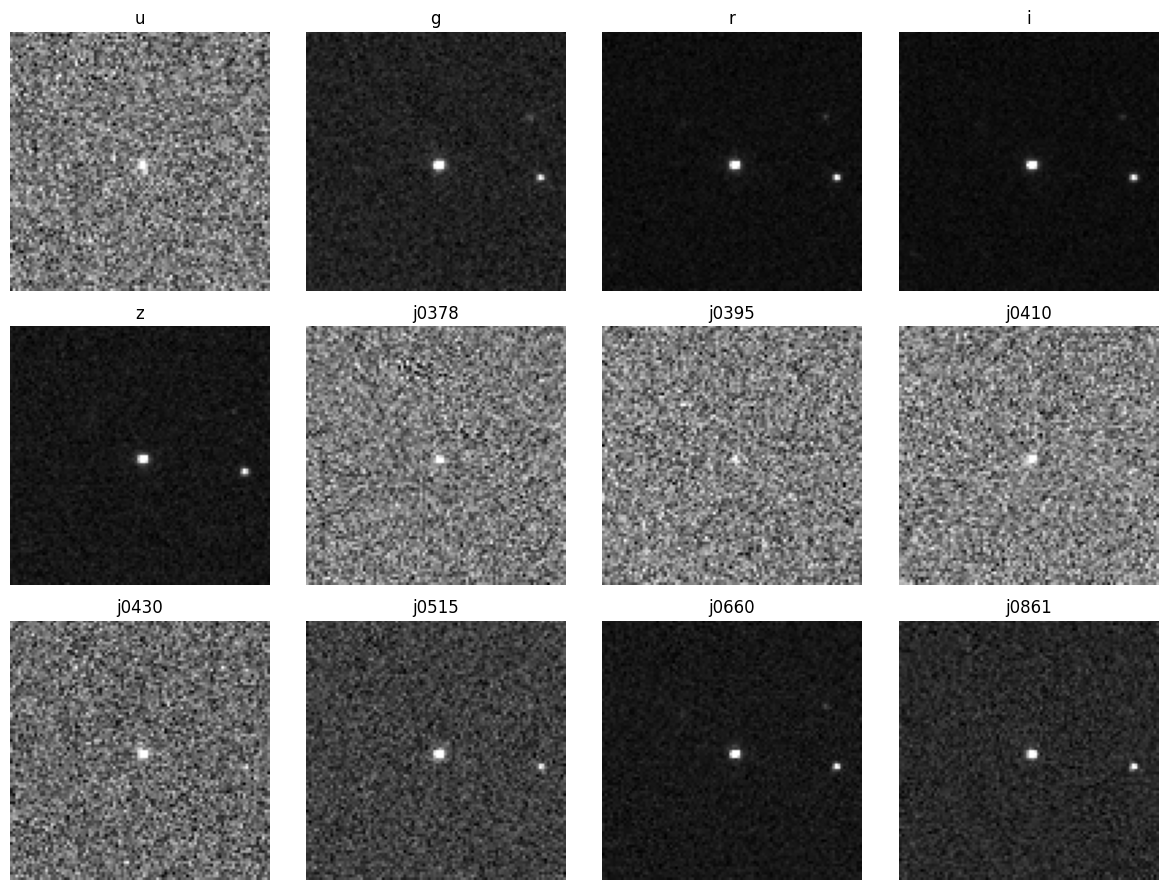

In [9]:
# plot all 12 bands with 0.1,99.9 percentile stretch
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
for ax, band, cut in zip(axes.flatten(), bands, cuts):
    p1, p99 = np.percentile(cut, (0.1, 99.9))
    ax.imshow(cut, vmin=p1, vmax=p99, cmap='gray')
    ax.set_title(band)
    ax.axis('off')
plt.tight_layout()
plt.show()